In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD DATASET ---
# Ganti nama file sesuai file kamu
file_path = 'dataset_tugas_purbaya_vs_srimulyani_lengkap(5000).csv'
df = pd.read_csv(file_path)

# --- 2. STATISTIK DATASET AWAL ---
total_data = len(df)
jumlah_tokoh = df['tokoh'].value_counts()

print(f"=== STATISTIK DATASET AWAL ===")
print(f"Total Data Mentah: {total_data} baris")

=== STATISTIK DATASET AWAL ===
Total Data Mentah: 9880 baris
Distribusi per Tokoh:
tokoh
Purbaya Yudhi Sadewa     4956
Sri Mulyani Indrawati    4924
Name: count, dtype: int64



=== RINGKASAN DATASET ===
                Tokoh  Jumlah Data  Persentase (%)
 Purbaya Yudhi Sadewa         4956           50.16
Sri Mulyani Indrawati         4924           49.84
-------------------------


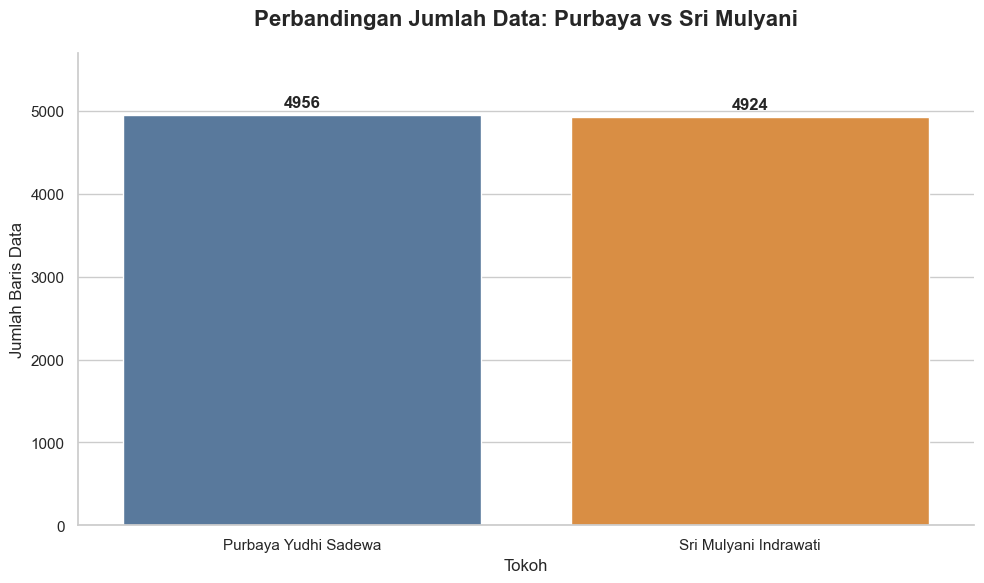

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LOAD DATASET ---
file_path = 'dataset_tugas_purbaya_vs_srimulyani_lengkap(5000).csv'
df = pd.read_csv(file_path)

# --- 2. PERSIAPAN DATA ---
stats = df['tokoh'].value_counts().reset_index()
stats.columns = ['Tokoh', 'Jumlah Data']
stats['Persentase (%)'] = (stats['Jumlah Data'] / len(df) * 100).round(2)

# Tampilkan Tabel di Terminal/Console
print("\n=== RINGKASAN DATASET ===")
print(stats.to_string(index=False))
print("-" * 25)

# --- 3. VISUALISASI GRAFIK ---
# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Membuat Bar Chart
colors = ['#4e79a7', "#c11b1b"] # Warna biru dan orange profesional
ax = sns.barplot(x='Tokoh', y='Jumlah Data', data=stats, palette=colors, hue='Tokoh', legend=False)

# Menambahkan Label Angka di Atas Bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

# Memberikan Judul dan Label
plt.title('Perbandingan Jumlah Data: Purbaya vs Sri Mulyani', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tokoh', fontsize=12)
plt.ylabel('Jumlah Baris Data', fontsize=12)
plt.ylim(0, stats['Jumlah Data'].max() * 1.15) # Memberi ruang di atas bar untuk label

# Menghilangkan border atas dan kanan agar lebih clean
sns.despine()

plt.tight_layout()
plt.show()

C:\Users\alfit\AppData\Local\Temp\ipykernel_24524\1016107006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channel_purbaya.values,
C:\Users\alfit\AppData\Local\Temp\ipykernel_24524\1016107006.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channel_sri.values, y=top_channel_sri.index,


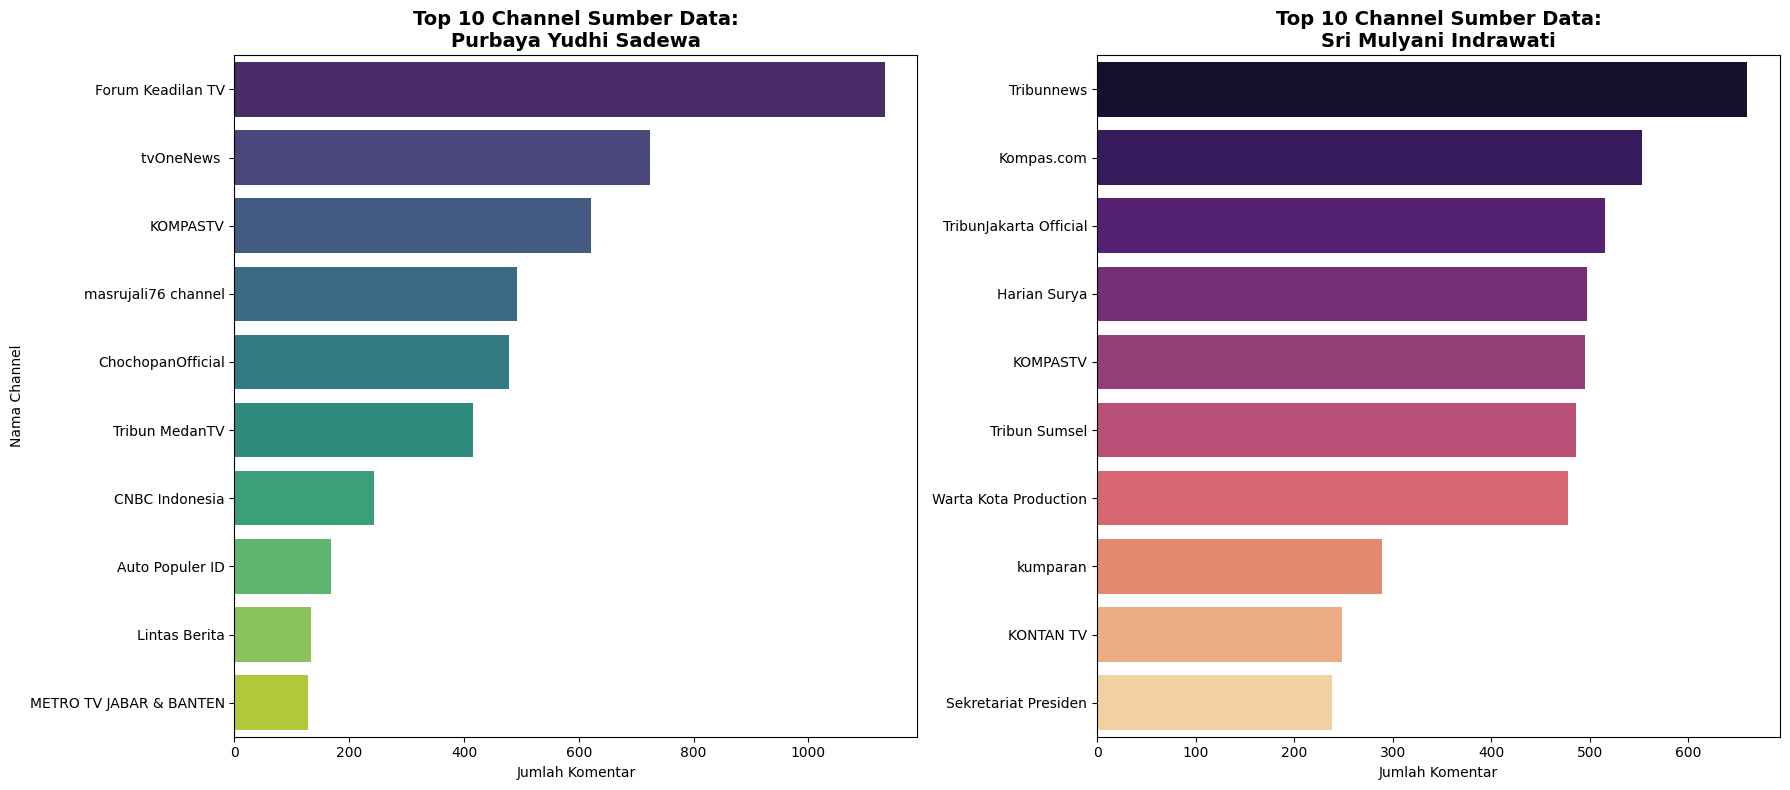

In [12]:
# --- 3. ANALISIS CHANNEL YOUTUBE (DIPISAHKAN PER TOKOH) ---
# Kita buat 2 subplot (grafik berdampingan)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Ukuran gambar diperbesar

# A. Grafik untuk Purbaya Yudhi Sadewa
tokoh_1 = 'Purbaya Yudhi Sadewa'
df_purbaya = df[df['tokoh'] == tokoh_1]
if not df_purbaya.empty:
    top_channel_purbaya = df_purbaya['channel_name'].value_counts().head(10)
    sns.barplot(x=top_channel_purbaya.values,
                y=top_channel_purbaya.index, palette='viridis', ax=axes[0])
    axes[0].set_title(
        f'Top 10 Channel Sumber Data:\n{tokoh_1}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Jumlah Komentar')
    axes[0].set_ylabel('Nama Channel')
else:
    axes[0].text(0.5, 0.5, 'Data Tidak Ditemukan', ha='center')

# B. Grafik untuk Sri Mulyani Indrawati
tokoh_2 = 'Sri Mulyani Indrawati'
df_sri = df[df['tokoh'] == tokoh_2]
if not df_sri.empty:
    top_channel_sri = df_sri['channel_name'].value_counts().head(10)
    sns.barplot(x=top_channel_sri.values, y=top_channel_sri.index,
                palette='magma', ax=axes[1])
    axes[1].set_title(
        f'Top 10 Channel Sumber Data:\n{tokoh_2}', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Jumlah Komentar')
    # Hilangkan label Y agar tidak penuh, karena sudah ada di kiri
    axes[1].set_ylabel('')
else:
    axes[1].text(0.5, 0.5, 'Data Tidak Ditemukan', ha='center')

plt.tight_layout()
plt.show()

In [5]:
# Fungsi untuk membuat tabel top video
def get_top_videos(tokoh_name):
    df_tokoh = df[df['tokoh'] == tokoh_name]
    # Hitung jumlah komentar per judul video
    top_videos = df_tokoh['video_title'].value_counts().head(5).reset_index()
    top_videos.columns = ['Judul Video YouTube', 'Jumlah Komentar']
    return top_videos


# 1. Top Video Purbaya
print("=== TOP 5 VIDEO: PURBAYA YUDHI SADEWA ===")
df_purbaya_videos = get_top_videos('Purbaya Yudhi Sadewa')
# Gunakan print(df_purbaya_videos) jika bukan di Jupyter
display(df_purbaya_videos)

# 2. Top Video Sri Mulyani
print("\n=== TOP 5 VIDEO: SRI MULYANI INDRAWATI ===")
df_sri_videos = get_top_videos('Sri Mulyani Indrawati')
display(df_sri_videos)  # Gunakan print(df_sri_videos) jika bukan di Jupyter

=== TOP 5 VIDEO: PURBAYA YUDHI SADEWA ===


,Judul Video YouTube,Jumlah Komentar
0,Purbaya Sebut UU Cipta Kerja Bikin Negara Rugi...,498
1,EFEK DOMINO SANG KOBOI PURBAYA YUDHI SADEWA,496
2,BADAI PURBAYA YUDHI SADEWA,494
3,Prabowo Terima Laporan dari Menkeu Purbaya Ada...,494
4,menyala 🔥 pak Purbaya 😁#faktamenarik #katakata...,493



=== TOP 5 VIDEO: SRI MULYANI INDRAWATI ===


,Judul Video YouTube,Jumlah Komentar
0,Anggota DPR Cecar Sri Mulyani: Efisiensi Angga...,498
1,GEGER Video Sri Mulyani Sebut Guru Jadi &#39;B...,497
2,Detik-detik Sri Mulyani Muncul di Publik seusa...,496
3,SRI MULYANI BUKA SUARA SOAL PAJAK E-COMMERCE #...,495
4,TERUNGKAP! Video Sri Mulyani Sebut Guru Jadi B...,494



=== TINGKAT RELEVANSI DATA ===
Data Relevan (mengandung keyword fiskal/tokoh): 3982 (40.30%)
Data Mungkin OOT (Out of Topic): 5898


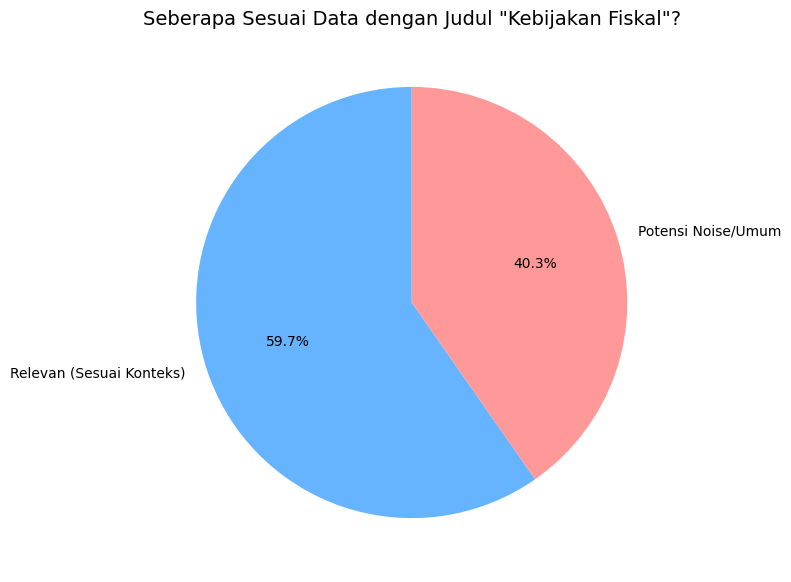

In [3]:


# --- 4. ANALISIS RELEVANSI DATA DENGAN JUDUL ---
# Judul: "Kebijakan Fiskal: Purbaya vs Sri Mulyani"
# Kita cek apakah komentar mengandung kata kunci relevan
keywords_fiskal = [
    'pajak', 'utang', 'apbn', 'fiskal', 'ekonomi', 'anggaran', 'gaji',
    'subsidi', 'bansos', 'keuangan', 'rupiah', 'investasi', 'bumn',
    'purbaya', 'sri mulyani', 'menkeu', 'menteri', 'prabowo', 'negara'
]


def check_relevance(text):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return any(keyword in text for keyword in keywords_fiskal)


# Terapkan filter
df['is_relevant'] = df['text'].apply(check_relevance)
relevance_counts = df['is_relevant'].value_counts()

# Hitung persentase
relevant_percent = (relevance_counts[True] / total_data) * 100
print(f"\n=== TINGKAT RELEVANSI DATA ===")
print(
    f"Data Relevan (mengandung keyword fiskal/tokoh): {relevance_counts.get(True, 0)} ({relevant_percent:.2f}%)")
print(f"Data Mungkin OOT (Out of Topic): {relevance_counts.get(False, 0)}")

# Visualisasi Relevansi (Pie Chart)
plt.figure(figsize=(7, 7))
plt.pie(relevance_counts, labels=['Relevan (Sesuai Konteks)', 'Potensi Noise/Umum'],
        autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Seberapa Sesuai Data dengan Judul "Kebijakan Fiskal"?', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. LOAD & PREPARE DATA ---
# Ganti dengan path file dataset kamu
file_path = 'dataset_tugas_purbaya_vs_srimulyani_lengkap(5000).csv'
df = pd.read_csv(file_path)

# ⚠️ PENTING: PENGECEKAN DATA LABEL ⚠️
# Kita cek apakah kolom 'sentiment' sudah ada?
if 'sentiment' not in df.columns:
    print("⚠️ PERINGATAN: Kolom 'sentiment' tidak ditemukan.")
    print("ℹ️  Membuat 'Dummy Sentiment' (Acak) agar code visualisasi bisa dicoba...")

    # Membuat sentiment dummy (HANYA UNTUK TESTING VISUALISASI)
    np.random.seed(42)  # Agar hasil acak tetap konsisten
    df['sentiment'] = np.random.choice(
        ['Positif', 'Negatif', 'Netral'], size=len(df))

    print("✅ Dummy 'sentiment' berhasil dibuat. (JANGAN LUPA GANTI DENGAN HASIL LABELLING ASLI NANTI!)")
else:
    print("✅ Kolom 'sentiment' ditemukan. Menggunakan data asli.")

# Definisikan variabel df_labelled
df_labelled = df.copy()
df_labelled['date'] = pd.to_datetime(df_labelled['date'])

# --- 2. VISUALISASI WORD CLOUD (PER SENTIMEN) ---


def plot_wordcloud(text_data, title, color_theme='viridis'):
    if len(text_data) == 0:
        print(f"❌ Tidak ada data teks untuk: {title}")
        return

    # Gabungkan semua teks menjadi satu string
    all_text = ' '.join(str(t) for t in text_data)

    # Stopwords (Kata umum yang dibuang)
    my_stopwords = set(['dan', 'yang', 'di', 'itu', 'ini', 'adalah', 'yg', 'gak', 'nya',
                        'ke', 'dari', 'aja', 'mau', 'bisa', 'tak', 'ada', 'ya', 'orang'])

    # Generate Word Cloud
    wc = WordCloud(width=800, height=400, background_color='white',
                   stopwords=my_stopwords, colormap=color_theme, max_words=100).generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()


print("\n--- MENAMPILKAN WORD CLOUD ---")
# A. Word Cloud Negatif Sri Mulyani
df_sri_neg = df_labelled[(df_labelled['tokoh'] == 'Sri Mulyani Indrawati') & (
    df_labelled['sentiment'] == 'Negatif')]
plot_wordcloud(df_sri_neg['text'],
               'Word Cloud: Apa Keluhan ke Sri Mulyani?', 'magma')

# B. Word Cloud Positif Purbaya
df_purbaya_pos = df_labelled[(df_labelled['tokoh'] == 'Purbaya Yudhi Sadewa') & (
    df_labelled['sentiment'] == 'Positif')]
plot_wordcloud(df_purbaya_pos['text'],
               'Word Cloud: Apa Harapan untuk Purbaya?', 'viridis')

⚠️ PERINGATAN: Kolom 'sentiment' tidak ditemukan.
ℹ️  Membuat 'Dummy Sentiment' (Acak) agar code visualisasi bisa dicoba...
✅ Dummy 'sentiment' berhasil dibuat. (JANGAN LUPA GANTI DENGAN HASIL LABELLING ASLI NANTI!)



--- MENAMPILKAN WORD CLOUD ---


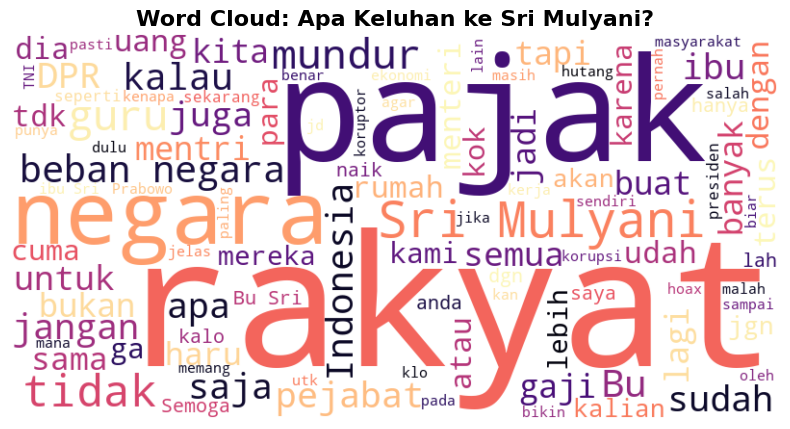

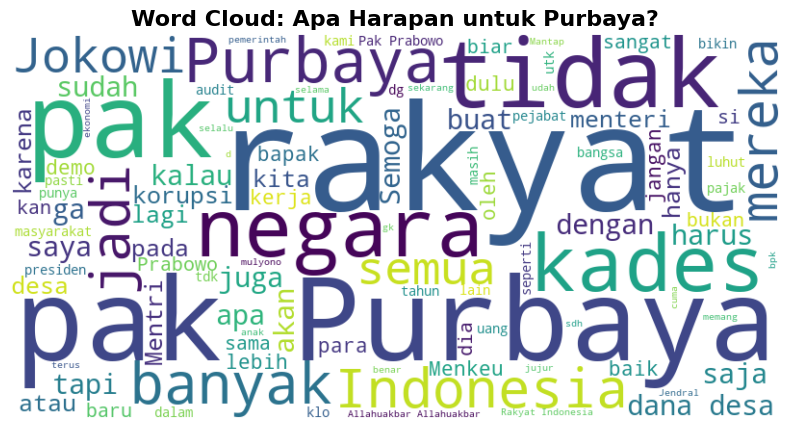

In [9]:

# --- 2. VISUALISASI WORD CLOUD (PER SENTIMEN) ---


def plot_wordcloud(text_data, title, color_theme='viridis'):
    if len(text_data) == 0:
        print(f"❌ Tidak ada data teks untuk: {title}")
        return

    # Gabungkan semua teks menjadi satu string
    all_text = ' '.join(str(t) for t in text_data)

    # Stopwords (Kata umum yang dibuang)
    my_stopwords = set(['dan', 'yang', 'di', 'itu', 'ini', 'adalah', 'yg', 'gak', 'nya',
                        'ke', 'dari', 'aja', 'mau', 'bisa', 'tak', 'ada', 'ya', 'orang'])

    # Generate Word Cloud
    wc = WordCloud(width=800, height=400, background_color='white',
                   stopwords=my_stopwords, colormap=color_theme, max_words=100).generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()


print("\n--- MENAMPILKAN WORD CLOUD ---")
# A. Word Cloud Negatif Sri Mulyani
df_sri_neg = df_labelled[(df_labelled['tokoh'] == 'Sri Mulyani Indrawati') & (
    df_labelled['sentiment'] == 'Negatif')]
plot_wordcloud(df_sri_neg['text'],
               'Word Cloud: Apa Keluhan ke Sri Mulyani?', 'magma')

# B. Word Cloud Positif Purbaya
df_purbaya_pos = df_labelled[(df_labelled['tokoh'] == 'Purbaya Yudhi Sadewa') & (
    df_labelled['sentiment'] == 'Positif')]
plot_wordcloud(df_purbaya_pos['text'],
               'Word Cloud: Apa Harapan untuk Purbaya?', 'viridis')


--- MENAMPILKAN GRAFIK TREN HARIAN ---


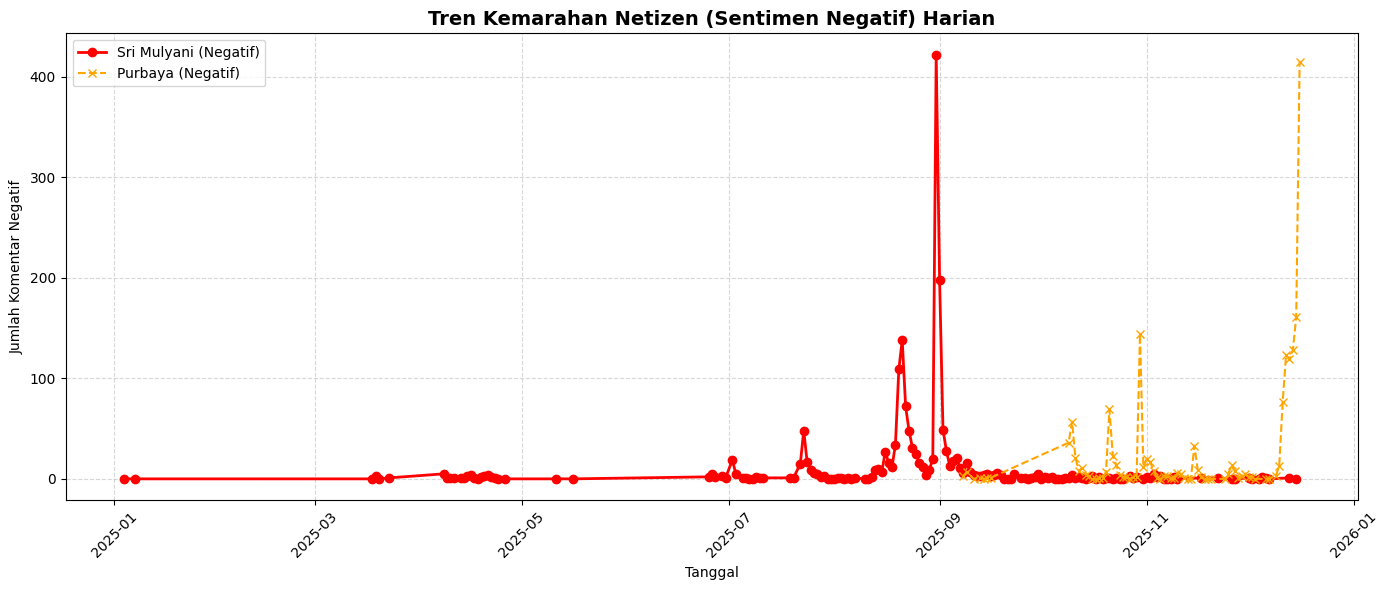

In [10]:

# --- 3. TIME SERIES ANALYSIS (TREN SENTIMEN HARIAN) ---
print("\n--- MENAMPILKAN GRAFIK TREN HARIAN ---")
# Menghitung jumlah sentimen per hari
daily_sentiment = df_labelled.groupby(
    [df_labelled['date'].dt.date, 'tokoh', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))

# Plot Garis untuk Sentimen Negatif (Sri Mulyani vs Purbaya)
if 'Negatif' in daily_sentiment.columns:
    # Data Sri Mulyani
    try:
        sri_data = daily_sentiment.xs('Sri Mulyani Indrawati', level='tokoh')
        plt.plot(sri_data.index, sri_data['Negatif'], marker='o',
                 color='red', linewidth=2, label='Sri Mulyani (Negatif)')
    except KeyError:
        pass

    # Data Purbaya
    try:
        purbaya_data = daily_sentiment.xs(
            'Purbaya Yudhi Sadewa', level='tokoh')
        plt.plot(purbaya_data.index, purbaya_data['Negatif'], marker='x',
                 color='orange', linestyle='--', label='Purbaya (Negatif)')
    except KeyError:
        pass

    plt.title('Tren Kemarahan Netizen (Sentimen Negatif) Harian',
              fontsize=14, fontweight='bold')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Komentar Negatif')
    plt.legend()
    plt.grid(True, alpha=0.5, linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data sentimen 'Negatif' untuk diplot.")


--- MENAMPILKAN VALIDASI MODEL (CONFUSION MATRIX) ---


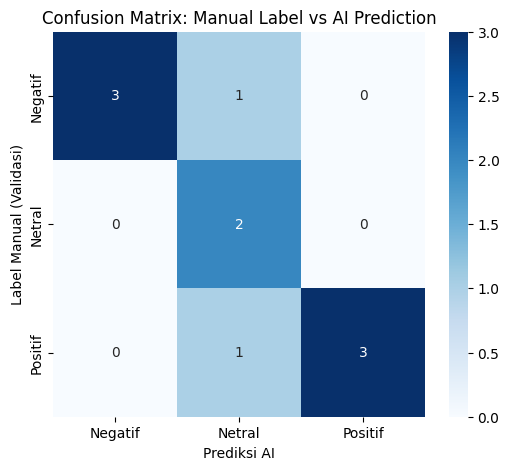

Laporan Akurasi (Contoh):
               precision    recall  f1-score   support

     Negatif       1.00      0.75      0.86         4
      Netral       0.50      1.00      0.67         2
     Positif       1.00      0.75      0.86         4

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.79        10
weighted avg       0.90      0.80      0.82        10



In [11]:
# --- 4. CONFUSION MATRIX (CONTOH VALIDASI) ---
print("\n--- MENAMPILKAN VALIDASI MODEL (CONFUSION MATRIX) ---")
# Data Simulasi (Ganti y_manual dengan data validasi aslimu nanti)
y_manual_sample = ['Positif', 'Negatif', 'Netral', 'Negatif',
                   'Positif', 'Netral', 'Negatif', 'Positif', 'Positif', 'Negatif']
y_prediksi_sample = ['Positif', 'Netral',  'Netral', 'Negatif',
                     'Positif', 'Netral', 'Negatif', 'Positif', 'Netral',  'Negatif']

labels = ['Negatif', 'Netral', 'Positif']
cm = confusion_matrix(y_manual_sample, y_prediksi_sample, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Manual Label vs AI Prediction')
plt.xlabel('Prediksi AI')
plt.ylabel('Label Manual (Validasi)')
plt.show()

print("Laporan Akurasi (Contoh):\n", classification_report(
    y_manual_sample, y_prediksi_sample))